In [1]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [65]:
# Loading data from five csv files:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
members = pd.read_csv('members.csv')
songs = pd.read_csv('songs.csv')
songs_x = pd.read_csv('song_extra_info.csv')

In [66]:
print ('train.csv', len(train.columns) )
print ('test.csv',len(test.columns) )
print ('songs.csv',len(songs.columns))
print ('song_extra_info.csv',len(songs_x.columns))
print ('members.csv',len(members.columns))

('train.csv', 6)
('test.csv', 6)
('songs.csv', 7)
('song_extra_info.csv', 3)
('members.csv', 7)


In [67]:
# #creating feature table of all files

F_table =[["train.csv", 6],
          ["test.csv", 6],
          ["songs.csv", 7],
          ["song_extra_info.csv",3 ],
          ["members.csv", 7]]
pd.DataFrame(F_table, columns=["Name of the file", "Number of features"])   

,Name of the file,Number of features
0,train.csv,6
1,test.csv,6
2,songs.csv,7
3,song_extra_info.csv,3
4,members.csv,7


In [68]:
#Data merging from songs and songs_x datafrom to train and test data

songs =pd.merge(songs, songs_x, on='song_id')
train=pd.merge(train, songs, on='song_id', how='left')
train=pd.merge(train, members, on='msno', how='left')
test=pd.merge(train, songs, on='song_id', how='left')
test=pd.merge(train, members, on='msno', how='left')

In [33]:
F_name=list(train)
print (F_name)

['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language', 'name', 'isrc', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date']


In [69]:
print (['msno', train['msno'].count()])
print (['song_id', train['song_id'].count()])
print (['source_system_tab', train['source_system_tab'].count()])
print (['source_screen_name', train['source_screen_name'].count()])
print (['source_type', train['msno'].count()])
print (['target', train['source_type'].count()])
print (['song_length', train['song_length'].count()])
print (['genre_ids', train['genre_ids'].count()])
print (['artist_name', train['artist_name'].count()])
print (['composer', train['composer'].count()])
print (['lyricist', train['lyricist'].count()])
print (['language', train['language'].count()])
print (['name', train['name'].count()])
print (['isrc', train['isrc'].count()])
print (['city', train['city'].count()])
print (['bd', train['bd'].count()])
print (['gender', train['gender'].count()])
print (['registered_via', train['registered_via'].count()])
print (['registration_init_time', train['registration_init_time'].count()])
print (['expiration_date', train['expiration_date'].count()])

['msno', 7377418]
['song_id', 7377418]
['source_system_tab', 7352569]
['source_screen_name', 6962614]
['source_type', 7377418]
['target', 7355879]
['song_length', 7375849]
['genre_ids', 7257512]
['artist_name', 7375849]
['composer', 5700724]
['lyricist', 4197876]
['language', 7375813]
['name', 7375847]
['isrc', 6799455]
['city', 7377418]
['bd', 7377418]
['gender', 4415939]
['registered_via', 7377418]
['registration_init_time', 7377418]
['expiration_date', 7377418]


In [39]:
data= [['msno', 7377418],
['song_id', 7377418],
['source_system_tab', 7352569],
['source_screen_name', 6962614],
['source_type', 7377418],
['target', 7355879],
['song_length', 7375849],
['genre_ids', 7257512],
['artist_name', 7375849],
['composer', 5700724],
['lyricist', 4197876],
['language', 7375813],
['name', 7375847],
['isrc', 6799455],
['city', 7377418],
['bd', 7377418],
['gender', 4415939],
['registered_via', 7377418],
['registration_init_time', 7377418],
['expiration_date', 7377418]]
pd.DataFrame(data, columns=["Name of feature", "Total count"])   

,Name of feature,Total count
0,msno,7377418
1,song_id,7377418
2,source_system_tab,7352569
3,source_screen_name,6962614
4,source_type,7377418
5,target,7355879
6,song_length,7375849
7,genre_ids,7257512
8,artist_name,7375849
9,composer,5700724


In [82]:

# 1% sample of items
#df = df.sample(frac=0.01)

In [70]:
#delete unwanted dataframes to avoid redundadncy
del songs 
del songs_x
del members

In [71]:
# Calculating Missing value rate of different features in training data
#train.isnull().sum()/train.isnull().count()*100
#missing_value =['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language', 'name', 'isrc', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date']
#percentage=[0, 0, 0.33, 5.62, 0.29, 0, 0, 0.02, 1.62, 0.02, 22.72, 47.09, 0.02, 0.02, 7.8, 0, 0, 40.14, 0, 0 ,0]

#pd.DataFrame(missing_value, columns=['Name of feature', 'Percentage'])


missing = train.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing['filling_factor'] = (train.shape[0] 
                                - missing['missing_count']) / train.shape[0] * 100
missing.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,lyricist,3179542,56.901697
1,gender,2961479,59.857514
2,composer,1676694,77.272618
3,isrc,577963,92.165782
4,source_screen_name,414804,94.377382
5,genre_ids,119906,98.374689
6,source_system_tab,24849,99.663175
7,source_type,21539,99.708041
8,language,1605,99.978244
9,name,1571,99.978705


In [ ]:
y_axis = missing['filling_factor'] 
x_label = missing['column_name']
x_axis = missing.index

fig = plt.figure(figsize=(11, 4))
plt.xticks(rotation=80, fontsize = 14)
plt.yticks(fontsize = 13)

N_thresh = 5
plt.axvline(x=N_thresh-0.5, linewidth=2, color = 'r')
plt.text(N_thresh-4.8, 30, 'filling factor \n < {}%'.format(round(y_axis[N_thresh],1)),
         fontsize = 15, family = 'fantasy', bbox=dict(boxstyle="round",
                   ec=(1.0, 0.5, 0.5),
                   fc=(0.8, 0.5, 0.5)))
N_thresh = 17
plt.axvline(x=N_thresh-0.5, linewidth=2, color = 'g')
plt.text(N_thresh, 30, 'filling factor \n = {}%'.format(round(y_axis[N_thresh],1)),
         fontsize = 15, family = 'fantasy', bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(0.5, 0.8, 0.5)))

plt.xticks(x_axis, x_label,family='fantasy', fontsize = 14 )
plt.ylabel('Filling factor (%)', family='fantasy', fontsize = 16)
plt.bar(x_axis, y_axis);

In [80]:
# Calculating Missing value rate of different features in training data
#test.isnull().sum()/test.isnull().count()*100
# missing = test.isnull().sum(axis=0).reset_index()
# missing.columns = ['column_name', 'missing_count']
# missing['filling_factor'] = (test.shape[0] 
#                                 - missing['missing_count']) / test.shape[0] * 100
# missing.sort_values('filling_factor').reset_index(drop = True)

In [72]:
# Replacing 'NA' with 'unkown'

for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()] = 'unknown'
train = train.fillna(value=0)

In [75]:
# converting registration & expiration dates in traing data in yyyy/mm/dd format: 

#Registration_date
train.registration_init_time = pd.to_datetime(train.registration_init_time, format='%Y%m%d', errors='ignore')

# expiration_date
train.expiration_date = pd.to_datetime(train.expiration_date,  format='%Y%m%d', errors='ignore')

In [76]:
#Feature extraction
# Seperating year, month and day from registration & expiration dates for user


#Registration_date
train['F_registration_year'] = train['registration_init_time'].dt.year
train['F_registration_month'] = train['registration_init_time'].dt.month
train['F_registration_day'] = train['registration_init_time'].dt.day


# expiration_date
train['F_expiration_year'] = train['expiration_date'].dt.year
train['F_expiration_month'] = train['expiration_date'].dt.month
train['F_expiration_day'] = train['expiration_date'].dt.day

In [77]:
#train.head().T

In [78]:
# Dates to category

train['registration_init_time'] = train['registration_init_time'].astype('category')
train['expiration_date'] = train['expiration_date'].astype('category')


In [79]:
# Object data to category
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
    
# Encoding categorical features
for col in train.select_dtypes(include=['category']).columns:
    train[col] = train[col].cat.codes

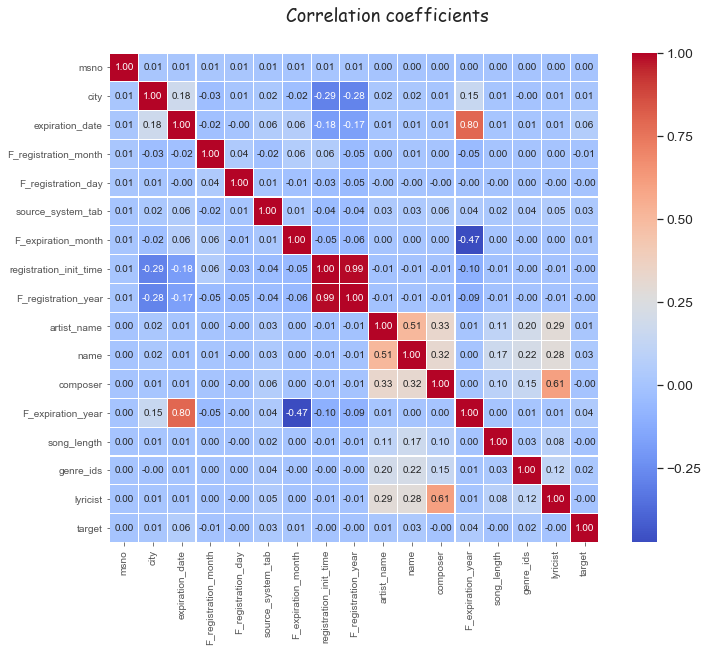

In [83]:
# Сorrelation matrix


f, ax = plt.subplots(figsize=(12, 9))
#_____________________________
# calculations of correlations
corrmat = train.dropna(how='any').corr()
#________________________________________
k = 17 # number of variables for heatmap

cols = corrmat.nlargest(k, 'msno')['msno'].index
cm = np.corrcoef(train[cols].dropna(how='any').values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
f.text(0.5, 0.93, "Correlation coefficients", ha='center', fontsize = 18, family='fantasy')
plt.show()

In [84]:

train['source_system_tab'].value_counts()

3    3684730
0    2179252
6     623286
5     476701
2     212266
1     167949
8      24849
4       6185
7       2200
Name: source_system_tab, dtype: int64

In [88]:
train['artist_name'].nunique()

40572

In [90]:
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan

In [91]:
train['F_song_year'] = train['isrc'].apply(isrc_to_year)

In [99]:
# Drop columns
train = train.drop(['expiration_date', 'lyricist'], 1)

In [102]:
# Model with the best estimator
model = RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(train[train.columns[train.columns != 'target']], train.target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [93]:
df_plot = pd.DataFrame({'features': train.columns[train.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

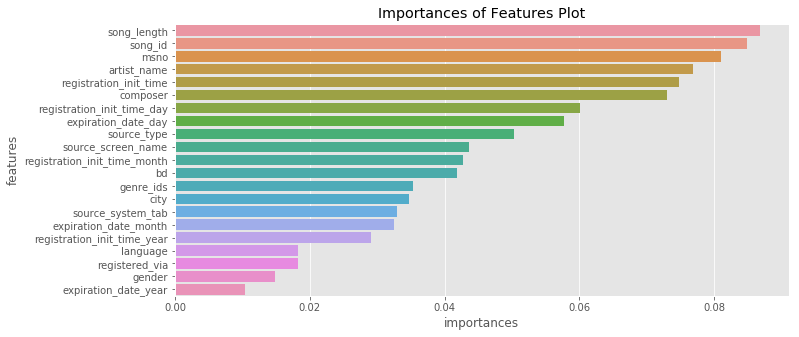

In [94]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [95]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [96]:
# Selected columns
df.columns

Index([u'msno', u'song_id', u'source_screen_name', u'source_type', u'target',
       u'song_length', u'artist_name', u'composer', u'bd',
       u'registration_init_time', u'registration_init_time_month',
       u'registration_init_time_day', u'expiration_date_day'],
      dtype='object')

In [97]:
# Train & Test split
target = df.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)

# Delete df
del df

In [98]:
# Create model
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=5, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [99]:
# Predicting
predict_labels = model.predict(test_data)

In [100]:
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61     11104
           1       0.61      0.64      0.63     11029

   micro avg       0.62      0.62      0.62     22133
   macro avg       0.62      0.62      0.62     22133
weighted avg       0.62      0.62      0.62     22133

